### Storke prediction dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 67.4k/67.4k [00:00<00:00, 1.03MB/s]

Extracting files...
Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\fedesoriano\stroke-prediction-dataset\versions\1


In [2]:
import pandas as pd
import os

# CSV 파일 경로 생성
csv_path = os.path.join(path, "healthcare-dataset-stroke-data.csv")

# 데이터셋 불러오기
df = pd.read_csv(csv_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


타겟 변수 정보    
stroke: 1이면 stroke이 있는 환자, 0이면 없는 환자

In [3]:
# 결측치 확인
missing_values = df.isnull().sum()

# 기본 통계량 확인
describe = df.describe(include='all')

# 범주형 변수의 고유값 확인
categorical_columns = df.select_dtypes(include='object').columns
unique_values = {col: df[col].unique() for col in categorical_columns}

# 타겟 변수 분포 확인
stroke_counts = df['stroke'].value_counts()

print("결측치:\n", missing_values)
print("\n기본 통계량:\n", describe)
print("\n범주형 변수 고유값:\n", unique_values)
print("\n타겟 변수 분포:\n", stroke_counts)

결측치:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

기본 통계량:
                   id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%  

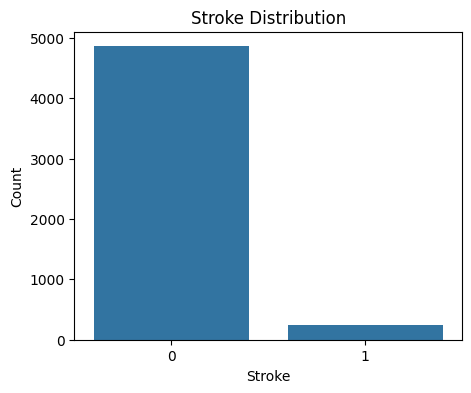

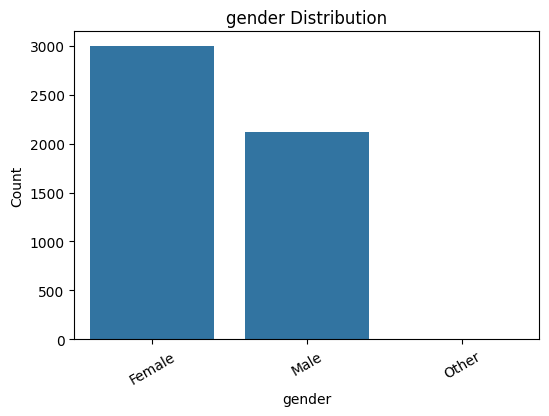

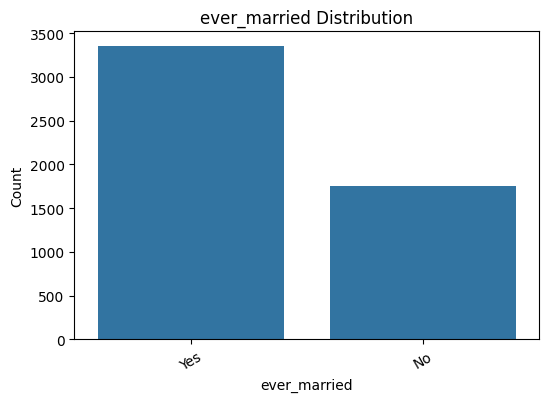

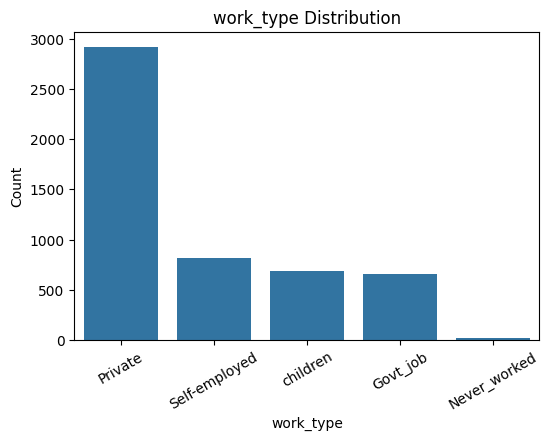

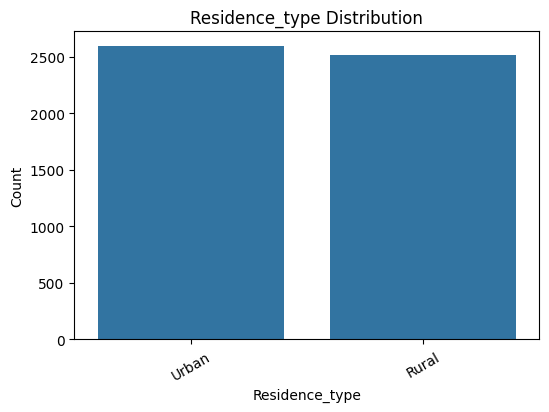

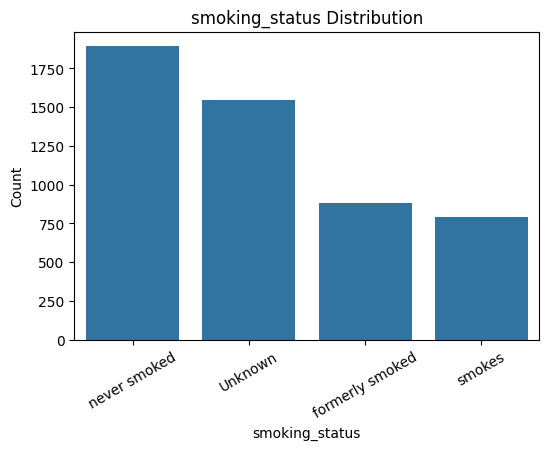

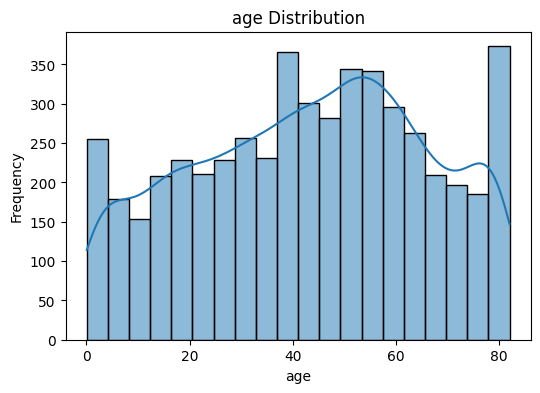

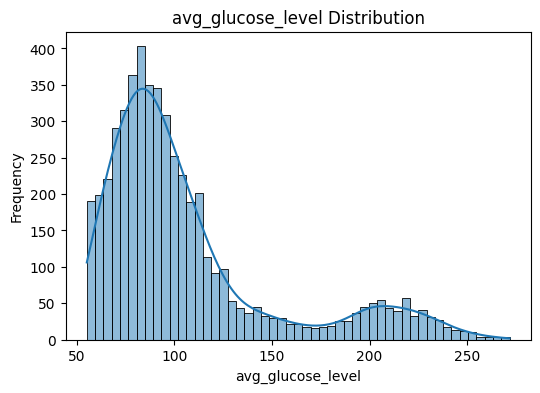

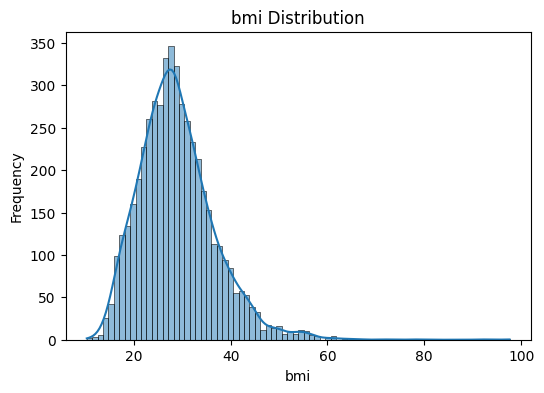

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# 1. 타겟 변수 분포 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# 2. 범주형 변수별 분포 시각화
for col in categorical_columns:
  plt.figure(figsize=(6, 4))
  sns.countplot(x=col, data=df, order=df[col].value_counts().index)
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=30)
  plt.show()

# 3. 수치형 변수의 분포 시각화
num_cols = ['age', 'avg_glucose_level', 'bmi']
for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col].dropna(), kde=True)
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

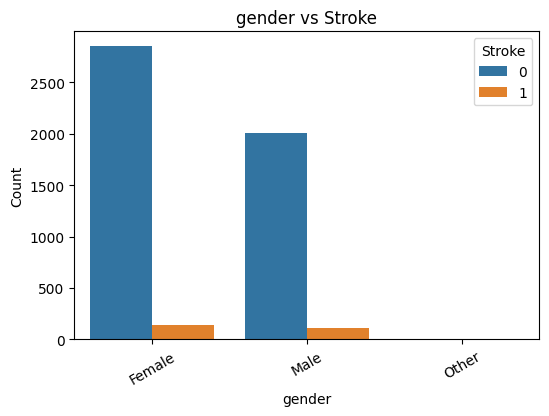

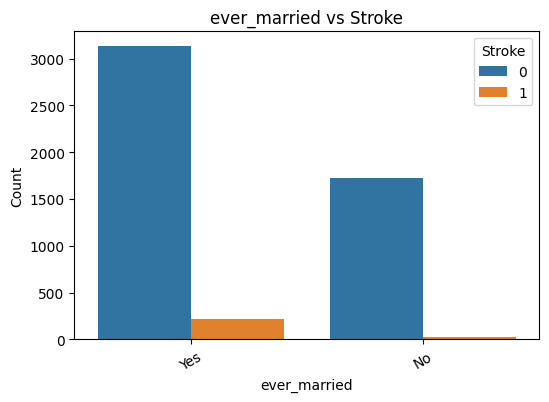

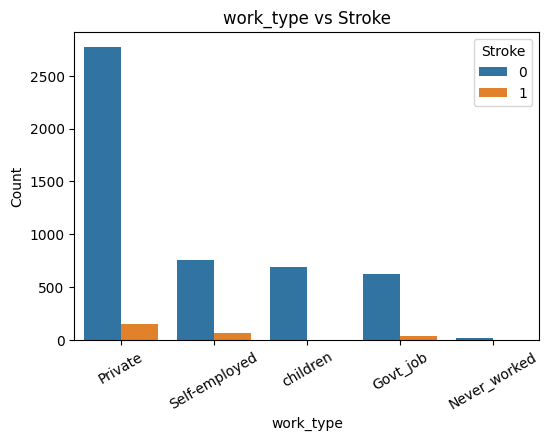

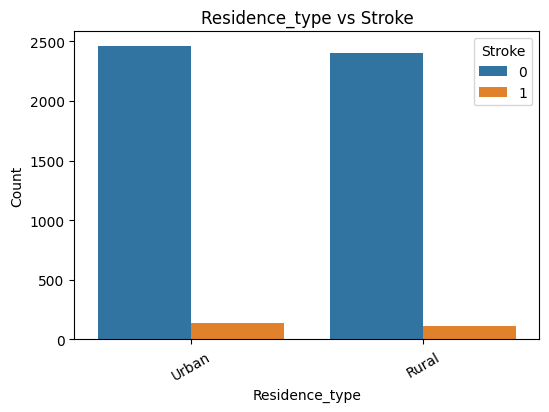

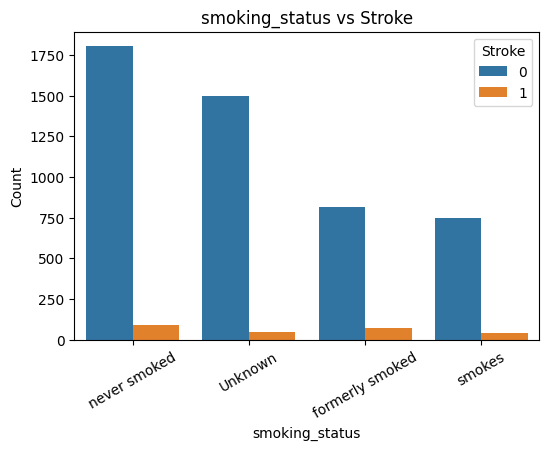

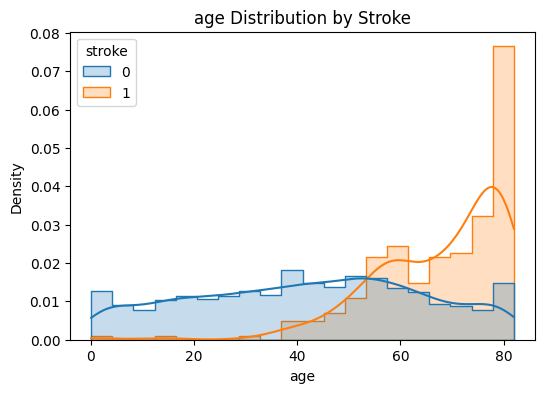

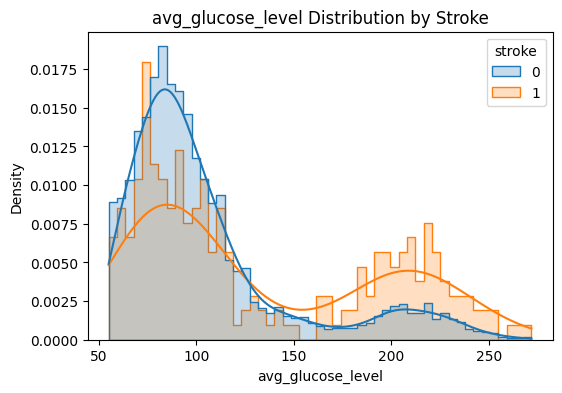

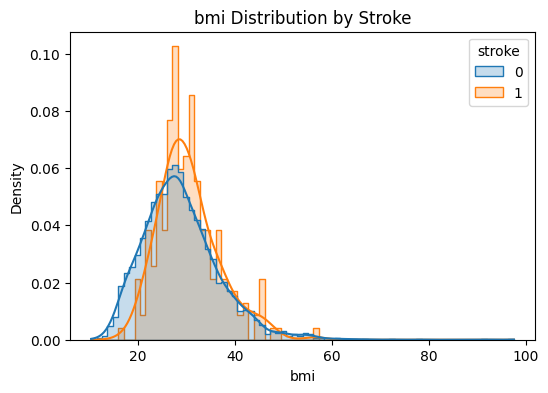

In [5]:
# 타겟 변수(stroke)와 각 독립 변수 간의 관계 시각화

# 1. 범주형 변수와 타겟 변수의 관계
for col in categorical_columns:
  plt.figure(figsize=(6, 4))
  sns.countplot(x=col, hue='stroke', data=df, order=df[col].value_counts().index)
  plt.title(f'{col} vs Stroke')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.legend(title='Stroke')
  plt.xticks(rotation=30)
  plt.show()

# 2. 수치형 변수와 타겟 변수의 관계
for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.histplot(data=df, x=col, hue='stroke', kde=True, element='step', stat='density', common_norm=False)
  plt.title(f'{col} Distribution by Stroke')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.show()

In [6]:
from scipy.stats import chi2_contingency

# 타겟 변수(stroke)와 독립 변수 간 상관관계 분석

# 1. 수치형 변수와 타겟 변수의 상관계수
corr_matrix = df[num_cols + ['stroke']].corr()
stroke_corr = corr_matrix['stroke'].drop('stroke')
print("수치형 변수와 타겟 변수(stroke) 간 상관계수:\n", stroke_corr)

# 2. 범주형 변수와 타겟 변수의 관계 (카이제곱 검정)

chi2_results = {}
for col in categorical_columns:
  contingency = pd.crosstab(df[col], df['stroke'])
  chi2, p, dof, expected = chi2_contingency(contingency)
  chi2_results[col] = {'chi2': chi2, 'p-value': p}

print("\n범주형 변수와 타겟 변수(stroke) 간 카이제곱 검정 결과:")
for col, res in chi2_results.items():
  print(f"{col}: chi2={res['chi2']:.2f}, p-value={res['p-value']:.4f}")

수치형 변수와 타겟 변수(stroke) 간 상관계수:
 age                  0.245257
avg_glucose_level    0.131945
bmi                  0.042374
Name: stroke, dtype: float64

범주형 변수와 타겟 변수(stroke) 간 카이제곱 검정 결과:
gender: chi2=0.47, p-value=0.7895
ever_married: chi2=58.92, p-value=0.0000
work_type: chi2=49.16, p-value=0.0000
Residence_type: chi2=1.08, p-value=0.2983
smoking_status: chi2=29.15, p-value=0.0000




ever_married (p-value = 0.0), work_type(p-value= 0.0), smoking_status (p-value = 0.0)는 stroke와 통계적으로 유의한 관계가 있다. 즉, 이 변수들의 분포는 stroke 여부에 따라 차이가 있다고 볼 수 있다.   

gender (p-value = 0.79), Residence_type (p-value = 0.30)는 stroke와 유의한 관계가 없다. 즉, 이 변수들의 분포는 stroke 여부와 통계적으로 차이가 없다고 볼 수 있다.
  
stroke 발생과 관련해 ever_married, work_type, smoking_status는 의미 있는 차이를 보이며, gender와 Residence_type은 의미 있는 차이를 보이지 않는다.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 결측치 처리 (bmi는 평균값으로 대체)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 범주형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 독립 변수(X), 타겟 변수(y) 분리
X = df_encoded.drop(['id', 'stroke'], axis=1)
y = df_encoded['stroke']

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_10692\70968545.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [8]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 로지스틱 회귀 모델 학습
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 예측 및 평가
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [9]:
# 로지스틱 회귀 모델의 가중치(계수) 출력
feature_names = X.columns
coefficients = logreg.coef_[0]

for name, coef in zip(feature_names, coefficients):
  print(f"{name}: {coef:.4f}")

age: 0.0744
hypertension: 0.4410
heart_disease: 0.1931
avg_glucose_level: 0.0039
bmi: 0.0033
gender_Male: 0.0642
gender_Other: -0.0087
ever_married_Yes: -0.2644
work_type_Never_worked: -0.0474
work_type_Private: 0.0532
work_type_Self-employed: -0.2294
work_type_children: 0.1970
Residence_type_Urban: 0.0811
smoking_status_formerly smoked: 0.1249
smoking_status_never smoked: -0.0839
smoking_status_smokes: 0.2462
